<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/Childern_vs_Adult_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from tensorflow.keras.models import Sequential
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [7]:
import zipfile

files = zipfile.ZipFile('/content/archive (5).zip')
files.extractall()

# View Random Image function

In [8]:
train_dir_image = 'train/'

def view_random_image(image_category):
  image_path = train_dir_image + image_category

  list_image = os.listdir(image_path)
  random_image = random.choice(list_image)

  image_path_join = os.path.join(image_path,random_image)

  img = mimg.imread(image_path_join)
  plt.imshow(img)
  plt.axis('off')


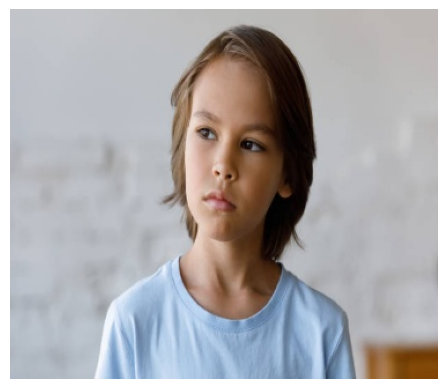

In [9]:
view_random_image('children')

# Function for visualizing the loss curve of the model

In [10]:
def view_loss_curve(model_history):

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  accuracy = model_history.history['accuracy']
  val_accuracy = model_history.history['val_accuracy']

  plt.plot(range(len(loss)),loss,label = 'loss')
  plt.plot(range(len(loss)),val_loss,label = 'val_loss')
  plt.title('Loss')
  plt.legend(loc='upper right')

  plt.figure()
  plt.plot(range(len(accuracy)),accuracy,label='accuracy')
  plt.plot(range(len(accuracy)),val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.legend(loc='lower right')

# Image Data Processing

In [11]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [12]:
train_dir = 'train/'
test_dir = 'test/'

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# Training the Model (Model Building)

In [36]:
model_1 = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data = test_data,
    epochs = 5
)

Epoch 1/5
22/22 [==============================] - 17s 714ms/step - loss: 0.6934 - accuracy: 0.5338 - val_loss: 0.6889 - val_accuracy: 0.5833
Epoch 2/5
22/22 [==============================] - 15s 696ms/step - loss: 0.6866 - accuracy: 0.5588 - val_loss: 0.6787 - val_accuracy: 0.5333
Epoch 3/5
22/22 [==============================] - 15s 667ms/step - loss: 0.6801 - accuracy: 0.5485 - val_loss: 0.6733 - val_accuracy: 0.5750
Epoch 4/5
22/22 [==============================] - 14s 653ms/step - loss: 0.6703 - accuracy: 0.6132 - val_loss: 0.6471 - val_accuracy: 0.6167
Epoch 5/5
22/22 [==============================] - 14s 686ms/step - loss: 0.6470 - accuracy: 0.6368 - val_loss: 0.6163 - val_accuracy: 0.6333


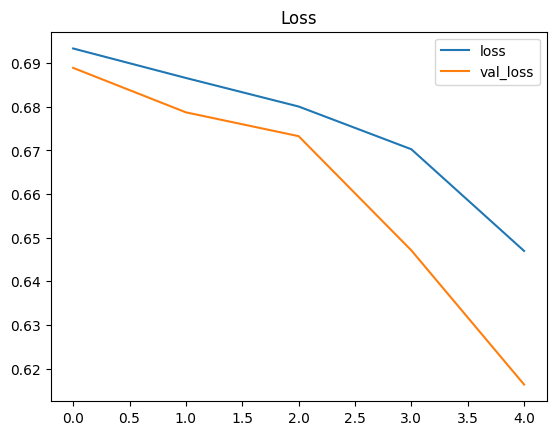

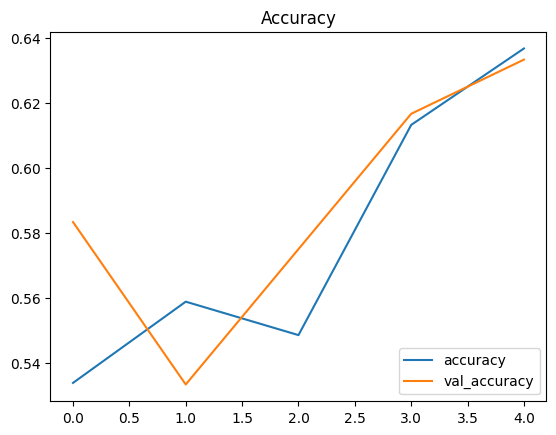

In [37]:
view_loss_curve(history_1)

In [17]:
## Image agumentation for tarining data

train_data_agumentation = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True

)

train_data_agumented = train_data_agumentation.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.


In [48]:
model_2 = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2= model_2.fit(
    train_data_agumented,
    validation_data = test_data,
    epochs = 5
)

Epoch 1/5
22/22 [==============================] - 21s 876ms/step - loss: 0.6961 - accuracy: 0.5206 - val_loss: 0.6836 - val_accuracy: 0.5667
Epoch 2/5
22/22 [==============================] - 18s 838ms/step - loss: 0.6869 - accuracy: 0.5603 - val_loss: 0.6743 - val_accuracy: 0.5500
Epoch 3/5
22/22 [==============================] - 18s 829ms/step - loss: 0.6889 - accuracy: 0.5103 - val_loss: 0.6660 - val_accuracy: 0.6250
Epoch 4/5
22/22 [==============================] - 18s 819ms/step - loss: 0.6789 - accuracy: 0.5618 - val_loss: 0.6563 - val_accuracy: 0.6333
Epoch 5/5
22/22 [==============================] - 18s 829ms/step - loss: 0.6780 - accuracy: 0.5912 - val_loss: 0.6452 - val_accuracy: 0.6417


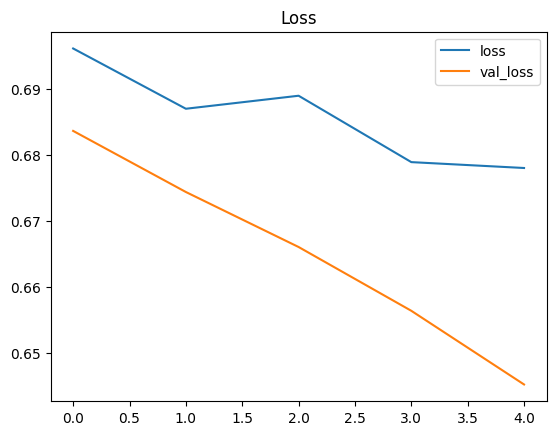

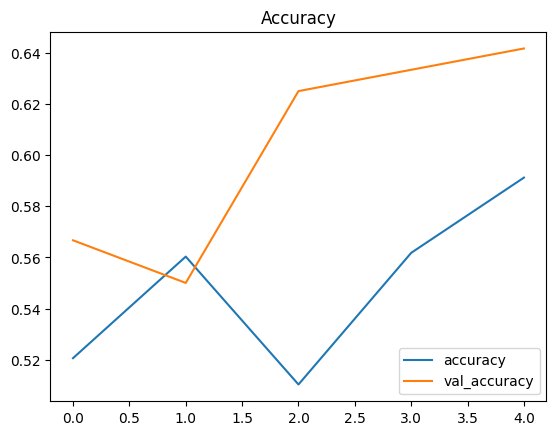

In [69]:
view_loss_curve(history_2)

In [49]:
model_2.evaluate(test_data)

4/4 [==============================] - 1s 201ms/step - loss: 0.6452 - accuracy: 0.6417


[0.6451745629310608, 0.6416666507720947]

In [38]:
model_1.evaluate(test_data)

4/4 [==============================] - 1s 199ms/step - loss: 0.6163 - accuracy: 0.6333


[0.6163464188575745, 0.6333333253860474]

# Model Prediction

In [63]:
import numpy as np

def prediction(image):
  img = image / 255

  resize_image = tf.image.resize(img,(224,224))
  image_pred = tf.expand_dims(resize_image,axis=0)
  pred = model_1.predict(image_pred)
  list_value = os.listdir('train/')
  output = np.argmax(pred)
  print(pred)
  print(list_value[output])

(-0.5, 369.5, 319.5, -0.5)

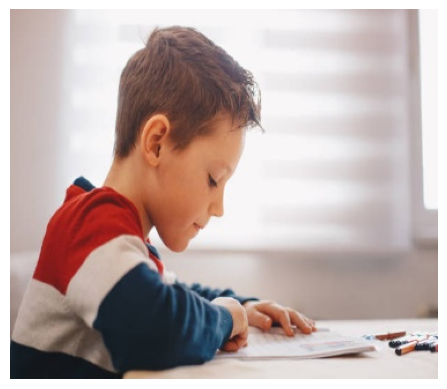

In [67]:
image = '/content/test/children/0.jpg'
image = mimg.imread(image)
plt.imshow(image)
plt.axis('off')

In [68]:
prediction(image)

1/1 [==============================] - 0s 28ms/step
[[0.45210665 0.54789335]]
children


🔑 **Note:** In our case model_1 performance is better than model_2. So we are going to stick with model_1